In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
pd.set_option("display.max_columns", 100)
pd.set_option('display.max_rows', 58)
pd.options.display.float_format = '{:,.2f}'.format
from datetime import datetime
from pylab import rcParams
rcParams['figure.figsize'] = 15, 5
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import MinMaxScaler
pd.options.display.max_columns =100
import pyodbc
import matplotlib.pyplot as plt
from matplotlib.pylab import rc, plot
import seaborn as sns ; sns.set(style='white')
%matplotlib inline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import precision_recall_curve, classification_report, confusion_matrix , roc_auc_score, roc_curve, auc, precision_score, recall_score, accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.cluster import KMeans
from xgboost import XGBClassifier
#from catboost import CatBoostClassifier
from sklearn.utils import resample
import random
from sklearn import decomposition
import pandas_profiling

In [51]:
# Train
df = pd.read_csv('train_csv.csv', sep='\t')
df2 = pd.read_csv('features_train_csv.csv', sep='\t')

df['buy_time'] = pd.to_datetime(df['buy_time'].apply(lambda x: datetime.fromtimestamp(x))) # переводим unix в формат времени
df2['buy_time'] = pd.to_datetime(df2['buy_time'].apply(lambda x: datetime.fromtimestamp(x))) # переводим unix в формат времени
df['month'] = df['buy_time'].dt.month

# Test
df3 = pd.read_csv('test_csv.csv', sep='\t')
df4 = pd.read_csv('features_test_csv.csv', sep='\t')

df3['buy_time'] = pd.to_datetime(df3['buy_time'].apply(lambda x: datetime.fromtimestamp(x))) # переводим unix в формат времени
df4['buy_time'] = pd.to_datetime(df4['buy_time'].apply(lambda x: datetime.fromtimestamp(x))) # переводим unix в формат времени
df3['month'] = df3['buy_time'].dt.month

In [3]:
df.head()

,id,vas_id,buy_time,target,month
0,721013,4.00,2018-11-19,1.00,11
1,1123097,6.00,2018-08-13,1.00,8
2,1123712,1.00,2018-08-06,0.00,8
3,132,2.00,2018-07-23,0.00,7
4,1055072,5.00,2018-10-15,0.00,10


In [4]:
df2.head()

,Unnamed: 0,id,buy_time,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,...,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252
0,465518,721013,2018-11-19,-96.80,109.46,-110.74,86.51,-116.16,65.41,-16.09,-65.08,-6.78,-30.01,-2.74,-4.01,-2.56,-66.19,-77.52,-0.00,-0.02,-0.11,-5.42,-3.18,-13.94,-10.74,-0.09,-0.00,-0.01,-2.08,0.20,-0.01,1.65,0.79,0.79,-0.00,-0.00,-0.00,-2.66,-0.07,-0.70,-192.03,"-2,234.69","-1,115.25","-1,119.44",-89.50,-119.72,-102.00,-52.32,-49.68,-7.90,...,0.00,0.04,-0.33,-0.01,"20,464.99","-45,175.26",-0.62,-30.72,"-61,790.16",0.76,"-39,521.17","-9,239.71",-2.11,-0.00,-0.62,-0.00,-0.62,-0.01,-0.11,"-572,669,535.55",-58.54,"1,043,766,830.60","-120,441,798.12",23.23,5.53,-33.30,-99.13,-10.77,-0.36,-0.13,-0.21,-6.36,-109.88,-871.69,-4.37,-246.11,-108.41,-509.44,-103.62,-16.30,-631.37,-608.77,-26.00,-37.63,-195.75,-20.83,-0.69,-12.18,-0.46,1.00
1,4244798,1123097,2018-08-13,-96.80,-196.32,-110.74,-248.93,-116.16,-270.03,-16.09,-65.08,-6.78,-30.01,-2.74,-4.01,-2.56,-66.19,-77.52,-0.00,-0.02,-0.11,-5.42,-3.18,-13.94,-10.74,-0.09,-0.00,-0.01,-2.08,0.20,-0.01,-0.35,-0.21,-0.21,-0.00,-0.00,-0.00,-2.66,-0.07,-0.70,-192.03,"-2,910.38","-1,154.71","-1,755.67",-89.50,-119.72,-105.81,-47.25,-58.56,-7.90,...,0.00,0.04,-0.33,-0.01,"16,167.17","-45,175.26",-0.62,-30.72,"-61,790.16",-0.24,"-42,051.17","-9,239.71",-2.11,-0.00,-0.62,-0.00,-0.62,-0.01,-0.11,"-572,669,535.55",-58.54,"-440,560,422.40","1,369,784,570.88",-8.10,-1.47,-33.30,-266.13,-34.77,-0.36,-0.13,-0.21,-30.36,-109.88,-876.69,-5.37,-247.11,-108.41,-512.44,-92.62,-17.30,-977.37,-613.77,-26.00,-37.63,-298.75,-25.83,-0.69,-12.18,-0.46,0.00
2,2711621,1123712,2018-08-06,-88.41,-375.80,-93.46,-392.85,-98.88,-413.95,-7.70,-56.69,-6.78,-30.01,5.65,-4.01,-2.56,-66.19,-77.52,-0.00,-0.02,-0.11,-5.42,-3.18,-5.05,-10.74,-0.09,-0.00,-0.01,-2.08,-0.80,-0.01,-0.35,-0.21,-0.21,-0.00,-0.00,-0.00,-2.66,-0.07,-0.70,-192.03,"-2,942.44","-1,186.76","-1,755.67",-89.50,-119.72,-119.66,-54.60,-65.06,-7.90,...,0.00,0.04,-0.33,-0.01,"1,113.60","-45,175.26",-0.62,-30.72,"-61,790.16",0.76,"-41,601.17","-9,239.71",-2.11,-0.00,-0.62,-0.00,-0.62,-0.01,-0.11,"961,351,664.45",-57.27,"1,074,557,797.60","-120,441,798.12",14.90,-1.47,-33.30,-266.13,-39.77,-0.36,-0.13,-0.21,-35.36,-109.88,-876.69,-5.37,-247.11,-108.41,-512.44,-106.62,-17.30,-977.37,-613.77,-26.00,-37.63,-306.75,-25.83,-0.69,-12.18,-0.46,0.00
3,2628022,132,2018-07-23,-96.80,216.78,-110.74,172.65,-116.16,151.55,-16.09,290.81,-6.78,-30.01,-2.74,-4.01,-2.56,-66.19,-77.52,-0.00,-0.02,-0.11,-5.42,-3.18,-13.94,-10.74,-0.09,-0.00,-0.01,-2.08,0.20,-0.01,-0.35,-0.21,-0.21,-0.00,-0.00,-0.00,-2.66,-0.07,-0.70,-122.03,-237.21,"-1,097.74",860.53,-89.50,-119.72,-73.88,-39.97,-33.91,-7.90,...,0.00,0.04,0.67,-0.01,"7,333.57","-45,175.26",0.38,-30.72,"-61,790.16",0.76,"-40,991.17","-9,239.71",-2.11,-0.00,0.38,-0.00,0.38,-0.01,-0.11,"-572,669,535.55",-58.54,"1,061,104,401.60","-120,441,798.12",-0.10,4.53,-33.30,-126.13,-23.77,13.64,-0.13,-0.21,-35.36,-107.88,-802.69,-3.37,-243.11,-108.41,-444.44,"1,320.38",0.70,-603.37,-272.77,-25.00,-37.63,9.25,-22.83,-0.69,-10.18,0.54,1.00
4,387766,1055072,2018-10-15,-34.51,56.66,-48.45,97.27,-53.87,76.17,31.37,117.98,40.68,153.05,-2.74,-4.01,-2.56,-66.19,-66.93,-0.00,-0.02,-0.11,-5.42,1.06,-13.94,36.72,-0.09,-0.00,-0.01,-2.08,0.20,-0.01,1.65,0.79,0.79,-0.00,-0.00,-0.00,38.02,-0.07,-0.70,57.97,"28,834.30","30,589.97","-1,755.67",-89.50,-119.72,22.10,-17.20,39.31,-7.90,...,0.00,0.04,0.67,-0.01,"-11,953.71","-45,175.26",0.38,-30.72,"-61,790.16",-0.24,"-42,051.17","-9,239.71",-2.11,-0.00,0.38,-0.00,0.38,-0.01,-0.11,"967,399,664.45",-51.76,"-440,560,422.40","1,400,675,116.88",-10.00,5.53,-33.30,594.87,-34.77,-0.36,-0.13,-0.21,-32.36,-109.88,"1,746.31",6.63,424.89,-108.41,"1,426.56","1,125.38",8.70

In [5]:
print(len(df[df.id.isin(df2['Unnamed: 0'])]))
print(len(df3[df3.id.isin(df2['Unnamed: 0'])]))

print(len(df3[df3.id.isin(df4['Unnamed: 0'])]))
print(len(df[df.id.isin(df4['Unnamed: 0'])]))

6029
1454
348
1474


In [52]:
# Из за стандартизации возниколо много отрицательных значений. 
# Переведем в положительные, просто добавив самое маленькое число
# Кажется, что данные были перемешаны и Unnamed: 0 бывший индекс и или id. Удалим его
del df2['Unnamed: 0']
del df4['Unnamed: 0']

for i in df2.iloc[:, 2:].columns:
    mins = abs(df2[i].min())
    df2[i] = df2[i] + mins
    
for i in df4.iloc[:, 2:].columns:
    mins = abs(df4[i].min())
    df4[i] = df4[i] + mins

## Посчитаем конверсии по каждому vas_id

In [7]:
vas_id, total_offers, take, not_take, conversion, share = [], [], [], [], [], []

for i in df['vas_id'].unique():
    unique_vas = df[df['vas_id']==i]
    vals = unique_vas['target'].value_counts()
    vas_id.append(i)
    total_offers.append(len(unique_vas))
    not_take.append(vals.values[0])
    try:
        take.append(vals.values[1])
    except: take.append(0)
    try:
        conversion.append(int(round(vals[1]/len(unique_vas),2)*100))
    except: conversion.append(0)
    
    share.append(int(round(len(unique_vas)/len(df),2)*100))
            
conversion = pd.DataFrame([ vas_id, total_offers, take, not_take, conversion, share]).T
conversion.columns =  'vas_id', 'total_offers', 'take', 'not_take', 'conversion, %', 'share,%'
print(f'total offers {len(df2)}')
conversion.sort_values(by='total_offers', ascending= False)

total offers 165000


,vas_id,total_offers,take,not_take,"conversion, %","share,%"
3,2.00,"54,217.00",641.00,"53,576.00",1.00,33.00
2,1.00,"53,171.00",691.00,"52,480.00",1.00,32.00
4,5.00,"22,986.00",219.00,"22,767.00",1.00,14.00
1,6.00,"16,322.00","6,657.00","9,665.00",41.00,10.00
0,4.00,"12,486.00","3,078.00","9,408.00",25.00,8.00
5,7.00,"2,676.00",23.00,"2,653.00",1.00,2.00
6,8.00,"2,187.00",45.00,"2,142.00",2.00,1.00
7,9.00,935.00,115.00,820.00,12.00,1.00
8,3.00,20.00,0.00,20.00,0.00,0.00


### Посчитаем и посмотрим на конверисии по каждому vas_id по месяцам

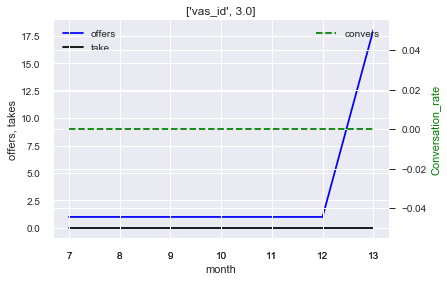

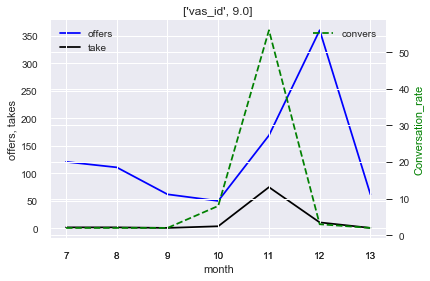

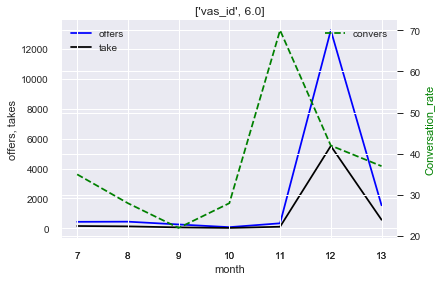

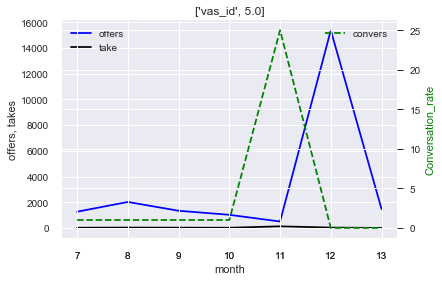

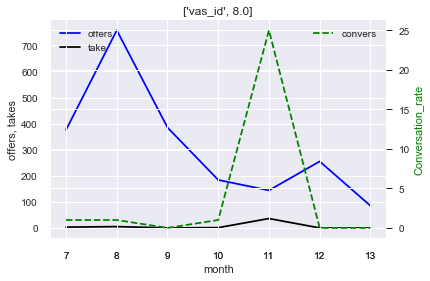

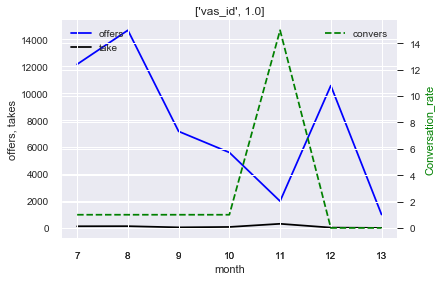

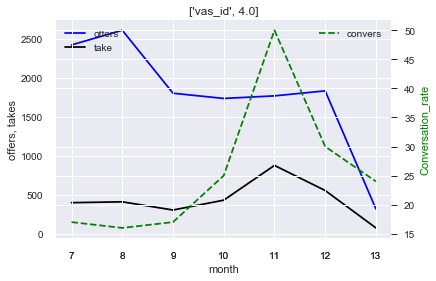

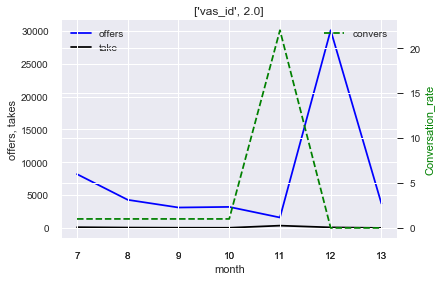

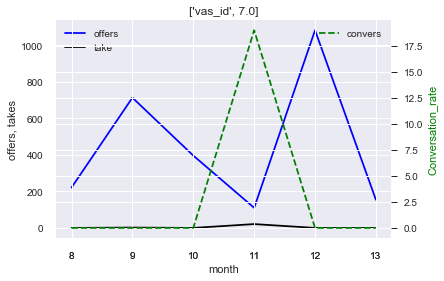

In [8]:
month, vas_id, total_offers, take, not_take, conversion = [], [], [], [], [], [] 

for k in df['month'].unique():
    df3 = df[df['month'] == k]
    
    for i in df3['vas_id'].unique():
        month.append(k)
        unique_vas = df3[df3['vas_id']==i]
        vals = unique_vas['target'].value_counts()
        vas_id.append(i)
        total_offers.append(len(unique_vas))
        not_take.append(vals.values[0])
        try:
            take.append(vals.values[1])
        except: take.append(0)
        try:
            conversion.append(int(round(vals[1]/len(unique_vas),2)*100))
        except: conversion.append(0)
            
conversion = pd.DataFrame([month, vas_id, total_offers, take, not_take, conversion]).T
conversion.columns = 'month', 'vas_id', 'total_offers', 'take', 'not_take', 'conversion, %'
conversion.sort_values(by=['month','total_offers'], ascending=[True, False])

conversion.month = np.where(conversion.month == 1, 13, conversion.month)
conversion = conversion.sort_values(by='month')

def plot_dinamics(q, z, w, i):

    import matplotlib.pyplot as plt
    import numpy as np
    fig, ax = plt.subplots()
    newax = fig.add_axes(ax.get_position())
    newax.patch.set_visible(False)
    newax.yaxis.set_label_position('right')
    newax.yaxis.set_ticks_position('right')
    ax.set_xlabel('month')
    ax.set_ylabel('offers, takes' )
    newax.set_ylabel('Conversation_rate', color='green')

    ax.plot(q, color ='blue', label = 'offers')
    ax.plot(z, color = 'black', label ='take')
    ax.legend(loc='upper left')
    
    newax.plot(w, color = 'green', ls='--', label = 'convers')
    newax.legend(loc='upper right')
    plt.title(['vas_id', i])

    plt.show()

conversion.index = conversion.month

for i in conversion['vas_id'].unique():
    offers = conversion[conversion['vas_id'] ==i]['total_offers']
    take = conversion[conversion['vas_id'] ==i]['take']
    convers = conversion[conversion['vas_id'] ==i]['conversion, %']
    plot_dinamics(offers, take, convers, i)

### В 11 месяце был резкий скачек конверсии по всем продуктам. А в 12 месяце сильный рост количества офферов.
Скорее всего это было в связи с новой маркетинговой компанией, или пересмотром vas продуктов.
В следствии чего, скорее всего, команда маркетолов на 12 месяцев решила увеличить количество предлагаемых оферов, рассчитывая на очень высокую конверсию, но в 12 месяце она спустилась до свой прежней отметки, кроме 6 и 4 vas_id

# Шумные записи

In [9]:
print('До', len (df))
ids = df.groupby('id')['vas_id'].count()[df.groupby('id')['vas_id'].count() > 1].index.tolist()
idss = df[df['id'].isin(ids)]
df[df['id'].isin(ids)].head()
idss = idss.groupby(['id', 'vas_id']).count().reset_index()[idss.groupby(['id', 'vas_id']).count().reset_index()['target']> 1]['id'].tolist()

#Интересно, что у одной Id в один день предложения по одному и тому же vas_id есть 2 разных таргета.
#Проверим одинаковые ли записи в df2 у этих  id. Если одинаковые удалим из, чтобы не зашумлять модель.
df = df[~df['id'].isin(idss)].drop_duplicates()
df2 = df2[~df2['id'].isin(idss)].drop_duplicates()

# удалим просто дубликаты 
index_no_duplicates = df2.iloc[:,3:].drop_duplicates().index
df2 = df2[df2.index.isin(index_no_duplicates)]
df = df[df.index.isin(index_no_duplicates)]
print('После', len (df))

До 165000
После 163723


In [10]:
#vas_id = 3 ни разу не брали, удалим записи из трейна. В тесте так же нету этого продукта

In [11]:
df.groupby('vas_id').count()

,id,buy_time,target,month
vas_id,,,,
1.00,53033,53033,53033,53033
2.00,54051,54051,54051,54051
3.00,14,14,14,14
4.00,12201,12201,12201,12201
5.00,22920,22920,22920,22920
6.00,15726,15726,15726,15726
7.00,2671,2671,2671,2671
8.00,2180,2180,2180,2180
9.00,927,927,927,927


In [12]:
df3.groupby('vas_id').count()

,id,buy_time,target,month
vas_id,,,,
1.00,996,996,996,996
2.00,3714,3714,3714,3714
3.00,18,18,18,18
4.00,321,321,321,321
5.00,1473,1473,1473,1473
6.00,1537,1537,1537,1537
7.00,154,154,154,154
8.00,85,85,85,85
9.00,62,62,62,62


# Не информативные фичи

In [14]:
# уберем неинформативные фичи, у которых одно значение повоторяется более чем len(DF)*0.98
col=[]
for i in df2.columns:
    if df2[i].value_counts().max() > len(df2) * 0.98:
        col.append(i)
print(len(col))

df2.drop(col, axis=1, inplace=True)
df4.drop(col, axis=1, inplace=True)

75


# Корреляции

In [16]:
def drop_corr_col(df, treshold , persent ):
    # n выбирается на какой выборке строить корреляции в процентах
    import random
    #a = [random.choice(df.index) for i in range(int(len(df)*persent))]
    #tmp = df.iloc[a]
    tmp = df
    tmp.fillna(0, inplace=True)
    to_drop_after_corr = pd.DataFrame(tmp.corr().abs())
    upper = to_drop_after_corr.where(np.triu(np.ones(to_drop_after_corr.shape), k =1).astype(np.bool))
    to_drop = [column for column in upper.columns if any(upper[column] > treshold)]
    df = df.drop(to_drop, axis = 1)
    del tmp, upper#, df, #a,
    print(len(to_drop))
    return df, to_drop, to_drop_after_corr

df2, to_drop, to_drop_after_corr = drop_corr_col(df2, 0.8, 1)

df4.drop(to_drop, axis=1, inplace=True)

54


# Найдем уникальные фичи, бинарные и категориальные

In [17]:
def check_for_cut_feat(df, nmin=3, nmax=10, retype=False): 
    num_unique=[]
    columns_list=[]
    for column in df.columns:
        num_unique.append(df[column].nunique())
        columns_list.append(column)
    cols_df = pd.DataFrame(num_unique,columns_list).reset_index()
    cols_df.columns = 'feature', 'num'

    to_drop_nunique = list(cols_df[cols_df['num'] == 1]['feature'])
    print('not_unique' , len(to_drop_nunique))
    
    to_bin = list(cols_df[cols_df['num'] == 2]['feature'])
    print('for_bin' ,len(to_bin))
    
    cat_features = list(cols_df[(cols_df['num'] <= nmax) & (cols_df['num'] >= nmin)]['feature'])
    print('for cat' ,len(cat_features))
    
    df_ = df.drop(to_drop_nunique, axis=1)
    
    le = LabelEncoder()
    for i in to_bin:
        df_[i] = le.fit_transform(df_[i].astype(int))
    
    if retype:
        for num_to_cat in cat_features:
            df_[num_to_cat] = df_[num_to_cat].astype(object)
        #df_ = pd.get_dummies(df_, columns=cat_features)
    
    return df_, cat_features, to_drop_nunique, to_bin, le

#df2.drop(un_unique(df2), axis=1, inplace = True)

df2, cat_features, to_drop_nunique, to_bin, le = check_for_cut_feat(df2, nmin=3, nmax=10, retype=True)

# бинизуем данные из теста
for i in to_bin:
    df4[i] = le.transform(df4[i].astype(int))
# переведем в категориальные из теста    
for i in cat_features:
    df4[i] = df4[i].astype(object)

not_unique 0
for_bin 10
for cat 4


# Выбросы

In [18]:
# Избавиться от выбрасов
def outlyers(df, columns, nmin= 0.05, nmax = 0.95, treshold = 0.001, del_or_min_max=True):
    col_name = []
    num_outlyers_min = []
    num_outlyers_max = []
    
    print('Number of values before cut = ', len(df))

    for column in df[columns].columns.tolist():
        quant_min = df[column].quantile(nmin)
        quant_max = df[column].quantile(nmax)
        
        if len(df[column][df[column] < quant_min]) < treshold * len(df) or \
                       len(df[column][df[column] > quant_max]) < treshold * len(df):
                
            if del_or_min_max: 
                col_name.append(column)
                num_outlyers_min.append(len(df[column][df[column] < quant_min]))
                num_outlyers_max.append(len(df[column][df[column] > quant_max]))
                df[column][df[column] < quant_min ] = quant_min
                df[column][df[column] > quant_max ] = quant_max
                
            df = df[df[column].between(quant_min, quant_max)]
            
#         col_name.append(column)
#         num_outlyers_min.append(len(df[column][df[column] < quant_min]))
#         num_outlyers_max.append(len(df[column][df[column] > quant_max]))
        
    outlyers_table = pd.DataFrame(index = col_name)
    outlyers_table['num_outlyers_min'] = num_outlyers_min
    outlyers_table['num_outlyers_max'] = num_outlyers_max
    outlyers_table['sum_outlyers'] = outlyers_table['num_outlyers_min'] + outlyers_table['num_outlyers_max'] 
    
    print('Number of values after cut = ', len(df))
    
#     out = outlyers_table[outlyers_table['sum_outlyers'] > outlyers_table['sum_outlyers'].quantile(0.75)].index.tolist()
    
#     for i in out:
#         sns.boxplot(x = df2[i])
#         plt.show()        
        
    return df, outlyers_table

In [19]:
# Выберем фичи с самым большим количеством выбросов. Удалим их.
# Для остальных фичей выбросы заменим 99 и 1 перцентилем
DF = df2.iloc[:, 3:]

df23, outlyers_table = outlyers(DF, DF.columns, nmin= 0.01, nmax = 0.99, treshold = 0.005, del_or_min_max=True)
outlyers_table.sort_values(by='sum_outlyers',ascending=False).head(5)

Number of values before cut =  163723
Number of values after cut =  163723


,num_outlyers_min,num_outlyers_max,sum_outlyers
47,138,1638,1776
1,41,1638,1679
8,12,1638,1650
36,6,1638,1644
49,5,1638,1643


In [20]:
#Странная фича номер 18. Удалим ее
del df2['18']
del df4['18']

# Важность фичей с помощью перестановок

In [21]:
new = df.merge(df2, on=['id', 'buy_time'])
new.drop(['buy_time', 'vas_id', 'month', 'id'], axis=1, inplace=True)

In [22]:
import eli5
from eli5.sklearn import PermutationImportance

train_X, val_X, train_y, val_y = train_test_split(new.drop('target',axis=1), new['target'], random_state=1, test_size=0.33)

scaler = MinMaxScaler()
train_X = pd.DataFrame(scaler.fit_transform(train_X), columns=val_X.columns)
val_X = pd.DataFrame(scaler.transform(val_X), columns=val_X.columns)

my_model = RandomForestClassifier(random_state=0).fit(train_X, train_y)

perm = PermutationImportance(my_model, random_state=1).fit(val_X, val_y)
#eli5.show_weights(perm, feature_names = val_X.columns.tolist())

imp = pd.DataFrame([val_X.columns, perm.feature_importances_]).T
imp.columns = 'feature', 'score'
imp_vals = imp[imp['score']>0].sort_values(by='score', ascending=False)['feature'].tolist()

print('Количество фичей, которые важны', len(imp_vals))

eli5.show_weights(perm, feature_names = val_X.columns.tolist())

Количество фичей, которые важны 90


Weight,Feature
0.0006 ± 0.0001,222
0.0002 ± 0.0001,193
0.0002 ± 0.0001,229
0.0002 ± 0.0001,146
0.0002 ± 0.0001,50
0.0002 ± 0.0001,129
0.0002 ± 0.0001,247
0.0002 ± 0.0001,47
0.0002 ± 0.0002,145
0.0002 ± 0.0001,207


# Стабильность фичей по месяцам c помощью Adversarial test

In [23]:
def metrics_calc(y_train, y_test, y_pred_test, y_pred_train, y_pred_test_bin, y_pred_train_bin):
    metrics = {
        'Gini_test'      : round (2 * roc_auc_score(y_test, y_pred_test[:,1])   - 1, 2),
        'Gini_train'     : round (2 * roc_auc_score(y_train, y_pred_train[:,1]) - 1, 2),
        'Precision_test' : round (precision_score  (y_test, y_pred_test_bin )      , 2),
        'Precision_train': round (precision_score  (y_train, y_pred_train_bin )    , 2),
        'Recall_test'    : round (recall_score     (y_test, y_pred_test_bin)       , 2),
        'Recall_train'   : round (recall_score     (y_train, y_pred_train_bin)     , 2),
        'Accuracy_test'  : round (accuracy_score   (y_test, y_pred_test_bin)       , 2),
        'Accuracy_train' : round (accuracy_score   (y_train, y_pred_train_bin)     , 2),
        'F1_score_test'  : round (f1_score(y_test, y_pred_test_bin, average='macro') , 2),
        'F1_score_train' : round (f1_score(y_train, y_pred_train_bin,average='macro'), 2) 
                }
    return metrics

In [24]:
new = df.merge(df2, on=['id', 'buy_time'])

imp_vals.append('month')
imp_vals.append('target')

new = new[imp_vals]

mon = new['month'].unique()
mo = mon[1:]

In [28]:
def check_monthly_stability(new):
    imp = []

    for i in mon:
        for k in mo:
            if i != k:
                n1 = new[new['month']==i]
                n2 = new[new['month']==k]

                n1['target'] = 1
                n2['target'] = 0
                n = n1.append(n2)

                data = n.drop(['target', 'month'], axis=1)

                train, test, y_train, y_test = train_test_split(data, n['target'], test_size=0.33, random_state=42)

                scaler = MinMaxScaler()
                train = pd.DataFrame(scaler.fit_transform(train), columns=train.columns)
                test = pd.DataFrame(scaler.transform(test), columns=test.columns)

                rfc = XGBClassifier()
                rfc.fit(train, y_train)

                y_pred_train = rfc.predict_proba(train)
                y_pred_test = rfc.predict_proba(test)

                y_pred_train_bin = rfc.predict(train)
                y_pred_test_bin = rfc.predict(test)

                importances_rfc = pd.DataFrame(abs(rfc.feature_importances_.T), train.columns).reset_index()
                importances_rfc.columns='feature', 'score'
                importances_rfc = importances_rfc.sort_values(by='score', ascending=False)

                metrics = metrics_calc(y_train, y_test, y_pred_test, y_pred_train, y_pred_test_bin, y_pred_train_bin)
                Gini_test  = round (2 * roc_auc_score(y_test, y_pred_test[:,1])   - 1, 2)
                Gini_train = round (2 * roc_auc_score(y_train, y_pred_train[:,1]) - 1, 2)

#                 print(metrics)
#                 print('- - - - - - ')
#                 print('month_1=',i, 'month_2=', k)
#                 print('most important features:', importances_rfc.head(3)['feature'].tolist())
#                 print('________')

                if Gini_test > 0.6:
                    imp.append(importances_rfc.head(5)['feature'].tolist())

    return imp

In [26]:
imp = check_monthly_stability(new)

{'Gini_test': 0.95, 'Gini_train': 0.96, 'Precision_test': 0.96, 'Precision_train': 0.97, 'Recall_test': 0.69, 'Recall_train': 0.71, 'Accuracy_test': 0.93, 'Accuracy_train': 0.94, 'F1_score_test': 0.88, 'F1_score_train': 0.89}
- - - - - - 
month_1= 11 month_2= 8
most important features: ['222', '250', '248']
________
{'Gini_test': 0.96, 'Gini_train': 0.96, 'Precision_test': 0.96, 'Precision_train': 0.97, 'Recall_test': 0.69, 'Recall_train': 0.71, 'Accuracy_test': 0.93, 'Accuracy_train': 0.93, 'F1_score_test': 0.88, 'F1_score_train': 0.89}
- - - - - - 
month_1= 11 month_2= 7
most important features: ['250', '222', '248']
________
{'Gini_test': 0.81, 'Gini_train': 0.85, 'Precision_test': 0.85, 'Precision_train': 0.88, 'Recall_test': 0.58, 'Recall_train': 0.61, 'Accuracy_test': 0.82, 'Accuracy_train': 0.84, 'F1_score_test': 0.78, 'F1_score_train': 0.8}
- - - - - - 
month_1= 11 month_2= 10
most important features: ['222', '250', '134']
________
{'Gini_test': 0.76, 'Gini_train': 0.8, 'Precis

{'Gini_test': 0.84, 'Gini_train': 0.86, 'Precision_test': 0.88, 'Precision_train': 0.88, 'Recall_test': 0.62, 'Recall_train': 0.63, 'Accuracy_test': 0.82, 'Accuracy_train': 0.83, 'F1_score_test': 0.8, 'F1_score_train': 0.81}
- - - - - - 
month_1= 9 month_2= 8
most important features: ['222', '134', '201']
________
{'Gini_test': 0.86, 'Gini_train': 0.88, 'Precision_test': 0.83, 'Precision_train': 0.83, 'Recall_test': 0.71, 'Recall_train': 0.73, 'Accuracy_test': 0.83, 'Accuracy_train': 0.84, 'F1_score_test': 0.82, 'F1_score_train': 0.83}
- - - - - - 
month_1= 9 month_2= 7
most important features: ['222', '134', '201']
________
{'Gini_test': 0.81, 'Gini_train': 0.84, 'Precision_test': 0.77, 'Precision_train': 0.78, 'Recall_test': 0.91, 'Recall_train': 0.94, 'Accuracy_test': 0.8, 'Accuracy_train': 0.82, 'F1_score_test': 0.8, 'F1_score_train': 0.82}
- - - - - - 
month_1= 9 month_2= 10
most important features: ['222', '134', '250']
________
{'Gini_test': 0.93, 'Gini_train': 0.94, 'Precision_

In [27]:
# месяца очень легко друг от друга отличаются. Это плохо для моделирвоания, т.к. популяция или фичи не стабильны.
# Поэтому удалим те фичи, которые это позволяют легко отличить выборки. Однако видно, что соседние месяца все же менее
# различимы, чем разные по времени месяца
# распарсим список 
imp2 = list(set([i[k] for k in range(3) for i in imp]))

In [29]:
imp = check_monthly_stability(new.drop(imp2, axis=1))

In [30]:
imp3 = list(set([i[k] for k in range(5) for i in imp]))
imp3

['205', '204', '77', '207', '225', '145', '224', '158', '58', '39']

In [32]:
imp_tot = imp2 + imp3

In [38]:
imp_tot

['134',
 '212',
 '201',
 '236',
 '229',
 '248',
 '191',
 '250',
 '222',
 '205',
 '204',
 '77',
 '207',
 '225',
 '145',
 '224',
 '158',
 '58',
 '39']

In [33]:
imp = check_monthly_stability(new.drop(imp_tot, axis=1))

In [37]:
imp

[]

In [36]:
new = new.drop(imp_tot, axis =1 )

#### Теперь проверим получившийся датасет с тестовым 

In [55]:
TEST = df4.merge(df3)

fin_features = new.columns.tolist()
fin_features.remove('target')

TEST = TEST[fin_features]

In [50]:
'48', '11', '9', '8', '49'

('48', '11', '9', '8', '49')

In [61]:
imp=[]

n1 = new.drop(['month', '47', '34', '36', '0', '48', '49', '11', '6', '213', '9', '21', '1', '37'], axis=1)
n2 = TEST.drop(['month', '47', '34', '36', '0', '48', '49', '11', '6', '213', '9', '21', '1', '37'], axis=1)

n1['target'] = 1
n2['target'] = 0
n = n1.append(n2)

train, test, y_train, y_test = train_test_split(n.drop('target',axis=1), n['target'], test_size=0.33, random_state=42)

scaler = MinMaxScaler()
train = pd.DataFrame(scaler.fit_transform(train), columns=train.columns)
test = pd.DataFrame(scaler.transform(test), columns=test.columns)

rfc = XGBClassifier()


rfc.fit(train, y_train)

y_pred_train = rfc.predict_proba(train)
y_pred_test = rfc.predict_proba(test)

y_pred_train_bin = rfc.predict(train)
y_pred_test_bin = rfc.predict(test)

importances_rfc = pd.DataFrame(abs(rfc.feature_importances_.T), train.columns).reset_index()
importances_rfc.columns='feature', 'score'
importances_rfc = importances_rfc.sort_values(by='score', ascending=False)

#metrics = metrics_calc(y_train, y_test, y_pred_test, y_pred_train, y_pred_test_bin, y_pred_train_bin)
Gini_test  = round (2 * roc_auc_score(y_test, y_pred_test[:,1])   - 1, 2)
Gini_train = round (2 * roc_auc_score(y_train, y_pred_train[:,1]) - 1, 2)

#print(metrics)
print(Gini_test, Gini_train)
print('- - - - - - ')
print('most important features:', importances_rfc.head(5)['feature'].tolist())
print('_______________________________________________________________________')

if Gini_test > 0.6:
    imp.append(importances_rfc.head(5)['feature'].tolist())
if Gini_test > 0.3:
    imp.append(importances_rfc.head(3)['feature'].tolist())

0.01 0.14
- - - - - - 
most important features: ['226', '239', '103', '143', '146']
_______________________________________________________________________


In [62]:
['21', '1', '37']

['21', '1', '37']

In [63]:
['47', '34', '36', '0', '48']

['47', '34', '36', '0', '48']

In [64]:
['48', '11', '9', '8', '49']

['48', '11', '9', '8', '49']

In [68]:
#Итоговые фичи 
features = n1.columns.tolist()

##### Повторили процедуру 3 раза

# Поделим клиентов на сегменты

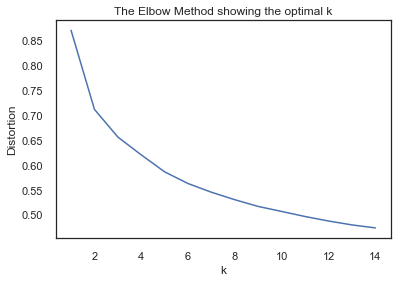

In [522]:
from sklearn.cluster import KMeans

from scipy.spatial.distance import cdist

scaler = MinMaxScaler()
Data = pd.DataFrame(scaler.fit_transform(data), columns=train.columns)
Data.drop('vas_id', axis=1, inplace=True)

distortions = []
K = range(1, 15)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(Data)
    distortions.append(sum(np.min(cdist(Data, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / Data.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()


# Делаем предсказания

In [103]:
def pred(az):
    data = az.drop(['target'], axis=1)

    train, test, y_train, y_test = train_test_split(data, az['target'], stratify=az['target'], test_size=0.23)

#     scaler = StandardScaler()
#     train = pd.DataFrame(scaler.fit_transform(train), columns=train.columns)
#     test = pd.DataFrame(scaler.transform(test), columns=test.columns)

    rfc = XGBClassifier(max_depth=2, learning_rate=0.1, n_estimators=100, random_state=77)

    rfc.fit(train, y_train)

    y_pred_train = rfc.predict_proba(train)
    y_pred_test = rfc.predict_proba(test)

    y_pred_train_bin = rfc.predict(train)
    y_pred_test_bin = rfc.predict(test)

    importances_rfc = pd.DataFrame(abs(rfc.feature_importances_.T), train.columns).reset_index()
    importances_rfc.columns='feature', 'score'
    importances_rfc = importances_rfc.sort_values(by='score', ascending=False)

    metrics = metrics_calc(y_train, y_test, y_pred_test, y_pred_train, y_pred_test_bin, y_pred_train_bin)
    
    print(metrics)
    
    return importances_rfc, metrics, rfc, y_train, y_test, y_pred_test, y_pred_train, train, test

In [73]:
new = df.merge(df2, on=['id', 'buy_time'])
features.append('vas_id')
features.append('target')

In [82]:
fin_data_set = new[features]

In [83]:
importances_rfc, metrics, rfc, y_train, y_test, y_pred_test, y_pred_train, train, test = pred(fin_data_set)

{'Gini_test': 0.74, 'Gini_train': 0.78, 'Precision_test': 0.0, 'Precision_train': 1.0, 'Recall_test': 0.0, 'Recall_train': 0.0, 'Accuracy_test': 0.93, 'Accuracy_train': 0.93, 'F1_score_test': 0.48, 'F1_score_train': 0.48}


/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


{'Gini_test': 0.03, 'Gini_train': 0.2, 'Precision_test': 0.0, 'Precision_train': 0.0, 'Recall_test': 0.0, 'Recall_train': 0.0, 'Accuracy_test': 0.76, 'Accuracy_train': 0.76, 'F1_score_test': 0.43, 'F1_score_train': 0.43}
{'Gini_test': 0.03, 'Gini_train': 0.2, 'Precision_test': 0.0, 'Precision_train': 0.0, 'Recall_test': 0.0, 'Recall_train': 0.0, 'Accuracy_test': 0.76, 'Accuracy_train': 0.76, 'F1_score_test': 0.43, 'F1_score_train': 0.43}
{'Gini_test': 0.02, 'Gini_train': 0.16, 'Precision_test': 0.46, 'Precision_train': 0.73, 'Recall_test': 0.02, 'Recall_train': 0.04, 'Accuracy_test': 0.59, 'Accuracy_train': 0.61, 'F1_score_test': 0.39, 'F1_score_train': 0.41}
{'Gini_test': 0.02, 'Gini_train': 0.16, 'Precision_test': 0.46, 'Precision_train': 0.73, 'Recall_test': 0.02, 'Recall_train': 0.04, 'Accuracy_test': 0.59, 'Accuracy_train': 0.61, 'F1_score_test': 0.39, 'F1_score_train': 0.41}
{'Gini_test': 0.02, 'Gini_train': 0.33, 'Precision_test': 0.0, 'Precision_train': 0.0, 'Recall_test': 0.0,

ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.

In [86]:
import eli5
from eli5.sklearn import PermutationImportance
fin = fin_data_set.drop('target', axis=1)

train_X, val_X, train_y, val_y = train_test_split(fin, fin_data_set['target'], random_state=1, test_size=0.33)

scaler = MinMaxScaler()
train_X = pd.DataFrame(scaler.fit_transform(train_X), columns=val_X.columns)
val_X = pd.DataFrame(scaler.transform(val_X), columns=val_X.columns)

my_model = RandomForestClassifier(random_state=0).fit(train_X, train_y)

perm = PermutationImportance(my_model, random_state=1).fit(val_X, val_y)
#eli5.show_weights(perm, feature_names = val_X.columns.tolist())

imp = pd.DataFrame([val_X.columns, perm.feature_importances_]).T
imp.columns = 'feature', 'score'
imp_vals = imp[imp['score']>0].sort_values(by='score', ascending=False)['feature'].tolist()
print('Количество фичей, которые важны', len(imp_vals))
eli5.show_weights(perm, feature_names = val_X.columns.tolist())

Exception ignored in: <bound method DMatrix.__del__ of <xgboost.core.DMatrix object at 0x12afcf940>>
Traceback (most recent call last):
  File "/anaconda3/lib/python3.6/site-packages/xgboost/core.py", line 366, in __del__
    if self.handle is not None:
AttributeError: 'DMatrix' object has no attribute 'handle'


Количество фичей, которые важны 26


Weight,Feature
0.0072 ± 0.0006,vas_id
0.0005 ± 0.0005,247
0.0004 ± 0.0007,60
0.0003 ± 0.0002,132
0.0003 ± 0.0009,146
0.0003 ± 0.0002,252
0.0003 ± 0.0004,143
0.0002 ± 0.0004,111
0.0002 ± 0.0003,194
0.0002 ± 0.0004,160


In [87]:
imp_vals

['vas_id',
 '247',
 '60',
 '132',
 '146',
 '252',
 '143',
 '111',
 '194',
 '160',
 '56',
 '129',
 '130',
 '110',
 '115',
 '159',
 '46',
 '148',
 '249',
 '208',
 '237',
 '164',
 '99',
 '42',
 '131',
 '73']

In [88]:
imp_vals.append('target')

In [104]:
importances_rfc, metrics, rfc, y_train, y_test, y_pred_test, y_pred_train, train, test = pred(new[imp_vals])

{'Gini_test': 0.76, 'Gini_train': 0.76, 'Precision_test': 0.0, 'Precision_train': 1.0, 'Recall_test': 0.0, 'Recall_train': 0.0, 'Accuracy_test': 0.93, 'Accuracy_train': 0.93, 'F1_score_test': 0.48, 'F1_score_train': 0.48}


In [105]:
# Выскоий Gini говорит о хорошей ранжирующей способности. Поправим границы определния 1 и 0. 
for i in [0.1,0.2,0.3,0.4, 0.5]:
    y_pred_train_bin = np.where(y_pred_train[:,1]>i,1,0)
    y_pred_test_bin = np.where(y_pred_test[:,1]>i,1,0)

    metrics = metrics_calc(y_train, y_test, y_pred_test, y_pred_train, y_pred_test_bin, y_pred_train_bin)
    print(metrics)
    print(i)

{'Gini_test': 0.76, 'Gini_train': 0.76, 'Precision_test': 0.34, 'Precision_train': 0.34, 'Recall_test': 0.87, 'Recall_train': 0.86, 'Accuracy_test': 0.87, 'Accuracy_train': 0.87, 'F1_score_test': 0.7, 'F1_score_train': 0.7}
0.1
{'Gini_test': 0.76, 'Gini_train': 0.76, 'Precision_test': 0.34, 'Precision_train': 0.34, 'Recall_test': 0.86, 'Recall_train': 0.85, 'Accuracy_test': 0.87, 'Accuracy_train': 0.87, 'F1_score_test': 0.71, 'F1_score_train': 0.71}
0.2
{'Gini_test': 0.76, 'Gini_train': 0.76, 'Precision_test': 0.42, 'Precision_train': 0.41, 'Recall_test': 0.6, 'Recall_train': 0.58, 'Accuracy_test': 0.91, 'Accuracy_train': 0.91, 'F1_score_test': 0.72, 'F1_score_train': 0.72}
0.3
{'Gini_test': 0.76, 'Gini_train': 0.76, 'Precision_test': 0.41, 'Precision_train': 0.42, 'Recall_test': 0.39, 'Recall_train': 0.39, 'Accuracy_test': 0.92, 'Accuracy_train': 0.92, 'F1_score_test': 0.68, 'F1_score_train': 0.68}
0.4
{'Gini_test': 0.76, 'Gini_train': 0.76, 'Precision_test': 0.0, 'Precision_train': 1

#### При границе вероятности 0.3 достигается максимальный F1 score

In [106]:
y_pred_train_bin = np.where(y_pred_train[:,1]>0.3,1,0)
y_pred_test_bin = np.where(y_pred_test[:,1]>0.3,1,0)

Y_pred = np.concatenate([y_pred_train_bin, y_pred_test_bin])
Y_true = np.concatenate([y_train, y_test])

In [107]:
vas = np.concatenate([train['vas_id'], test['vas_id']])

check = pd.DataFrame([vas, Y_true, Y_pred]).T
check.columns = 'vas' ,'true', 'predicted'
check['num_true=predicted'] = check['true'] == check['predicted']
check.groupby('vas').agg({'sum', 'count', 'mean'})

true               predicted                num_true=predicted  \
      count      sum mean     count       sum mean              count   
vas                                                                     
1.00  53208   703.00 0.01     53208      0.00 0.00              53208   
2.00  54260   657.00 0.01     54260      0.00 0.00              54260   
3.00     40     0.00 0.00        40      0.00 0.00                 40   
4.00  12761 3,211.00 0.25     12761      5.00 0.00              12761   
5.00  22994   220.00 0.01     22994      0.00 0.00              22994   
6.00  16879 6,939.00 0.41     16879 16,879.00 1.00              16879   
7.00   2676    23.00 0.01      2676      0.00 0.00               2676   
8.00   2191    47.00 0.02      2191      0.00 0.00               2191   
9.00    941   117.00 0.12       941      0.00 0.00                941   

                     
           sum mean  
vas                  
1.00 52,505.00 0.99  
2.00 53,603.00 0.99  
3.00     40.00 1.00  
4.00  9,551.00 0.75  
5.00 22,774.00 0.99  
6.00  6,939.00 0.41  
7.00  2,653.00 0.99  
8.00  2,144.00 0.98  
9.00    824.00 0.88

Confusion matrix, without normalization
[[33132  2296]
 [ 1110  1631]]


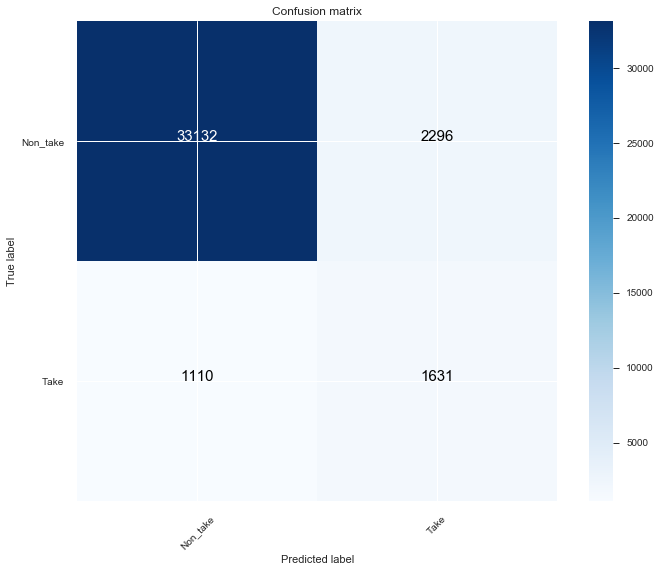

Confusion matrix, without normalization
[[110959   7646]
 [  3865   5311]]


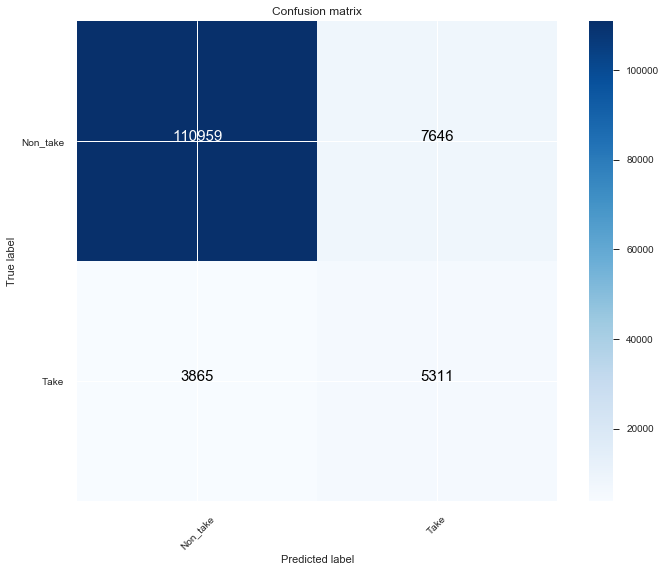

In [108]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix = confusion_matrix(y_test, y_pred_test_bin)
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['Non_take', 'Take'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show();
cnf_matrix = confusion_matrix(y_train, y_pred_train_bin)
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['Non_take', 'Take'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

# Проверим результаты на кросс валидации

In [115]:
def compute_roc_auc(index, rfc):
    y_predict = rfc.predict_proba(X.iloc[index])[:,1]
    fpr, tpr, thresholds = roc_curve(y.iloc[index], y_predict)
    auc_score = auc(fpr, tpr)
    return fpr, tpr, auc_score

def plot_roc_curve(fprs, tprs):
    
    # Initialize useful lists + the plot axes.
    tprs_interp = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    f, ax = plt.subplots(figsize=(8, 5))
    
    # Plot ROC for each K-Fold + compute AUC scores.
    for i, (fpr, tpr) in enumerate(zip(fprs, tprs)):
        tprs_interp.append(np.interp(mean_fpr, fpr, tpr))
        tprs_interp[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        ax.plot(fpr, tpr, lw=1, alpha=0.3,  label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
        
    # Plot the luck line.
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Luck', alpha=.8)
    
    # Plot the mean ROC.
    mean_tpr = np.mean(tprs_interp, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b', label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc), lw=2, alpha=.8)
    
    # Plot the standard deviation around the mean ROC.
    std_tpr = np.std(tprs_interp, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2, label=r'$\pm$ 1 std. dev.')
    
    # Fine tune and show the plot.
    ax.set_xlim([-0.05, 1.05])
    ax.set_ylim([-0.05, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic')
    ax.legend(loc="lower right")
    plt.show()
    return (f, ax)


def cv(X, y, splits = 3, rfc = rfc):
    
    cv = StratifiedKFold( n_splits = splits )
    results = pd.DataFrame(columns = ['training_score', 'test_score'])
    fprs, tprs, scores = [], [], []

    for train_index, test_index in cv.split(X, y):
        rfc.fit(X.iloc[train_index],y.iloc[train_index])
        _, _, auc_score_train = compute_roc_auc(train_index, rfc)
        fpr, tpr, auc_score = compute_roc_auc(test_index, rfc)
        scores.append((auc_score_train, auc_score))
        fprs.append(fpr)
        tprs.append(tpr)
    
    CV = pd.DataFrame(scores, columns=['AUC Train', 'AUC Test'])
    CV['AUC_diff'] = CV['AUC Train'] - CV['AUC Test']
    plot_roc_curve(fprs, tprs);
    print(CV)
    print('Standart_dev train = ', round(CV['AUC Train'].std(), 3))
    print('Standart_dev test  = ', round(CV['AUC Test'].std(), 3))
    print('Standart_dev diff  = ', round(CV['AUC_diff'].std(), 3))
    print('Number of samples in each fold ', 'train = ', len(train_index), ', test = ', len(test_index))
    print( 'Share of test = ', int(len(test_index) / len(train_index) * 100), '%')
    
    
    #return CV

Ddata = new[imp_vals].drop('target', axis=1)

cv(X = Ddata, y = new['target'], splits = 3, rfc=rfc)

NameError: name 'X' is not defined

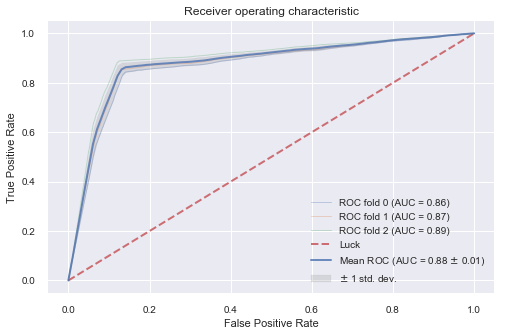

   AUC Train  AUC Test  AUC_diff
0       0.89      0.86      0.03
1       0.89      0.87      0.01
2       0.88      0.89     -0.02
Standart_dev train =  0.007
Standart_dev test  =  0.015
Standart_dev diff  =  0.022
Number of samples in each fold  train =  110634 , test =  55316
Share of test =  49 %


In [118]:
def compute_roc_auc(index, rfc):
    y_predict = rfc.predict_proba(X.iloc[index])[:,1]
    fpr, tpr, thresholds = roc_curve(y.iloc[index], y_predict)
    auc_score = auc(fpr, tpr)
    return fpr, tpr, auc_score

def plot_roc_curve(fprs, tprs):
    
    # Initialize useful lists + the plot axes.
    tprs_interp = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    f, ax = plt.subplots(figsize=(8, 5))
    
    # Plot ROC for each K-Fold + compute AUC scores.
    for i, (fpr, tpr) in enumerate(zip(fprs, tprs)):
        tprs_interp.append(np.interp(mean_fpr, fpr, tpr))
        tprs_interp[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        ax.plot(fpr, tpr, lw=1, alpha=0.3,  label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
        
    # Plot the luck line.
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Luck', alpha=.8)
    
    # Plot the mean ROC.
    mean_tpr = np.mean(tprs_interp, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b', label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc), lw=2, alpha=.8)
    
    # Plot the standard deviation around the mean ROC.
    std_tpr = np.std(tprs_interp, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2, label=r'$\pm$ 1 std. dev.')
    
    # Fine tune and show the plot.
    ax.set_xlim([-0.05, 1.05])
    ax.set_ylim([-0.05, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic')
    ax.legend(loc="lower right")
    plt.show()
    return (f, ax)


def cv(X, y, splits = 3, rfc = rfc):
    
    cv = StratifiedKFold( n_splits = splits )
    results = pd.DataFrame(columns = ['training_score', 'test_score'])
    fprs, tprs, scores = [], [], []

    for train_index, test_index in cv.split(X, y):
        rfc.fit(X.iloc[train_index],y.iloc[train_index])
        _, _, auc_score_train = compute_roc_auc(train_index, rfc)
        fpr, tpr, auc_score = compute_roc_auc(test_index, rfc)
        scores.append((auc_score_train, auc_score))
        fprs.append(fpr)
        tprs.append(tpr)
    
    CV = pd.DataFrame(scores, columns=['AUC Train', 'AUC Test'])
    CV['AUC_diff'] = CV['AUC Train'] - CV['AUC Test']
    plot_roc_curve(fprs, tprs);
    print(CV)
    print('Standart_dev train = ', round(CV['AUC Train'].std(), 3))
    print('Standart_dev test  = ', round(CV['AUC Test'].std(), 3))
    print('Standart_dev diff  = ', round(CV['AUC_diff'].std(), 3))
    print('Number of samples in each fold ', 'train = ', len(train_index), ', test = ', len(test_index))
    print( 'Share of test = ', int(len(test_index) / len(train_index) * 100), '%')
    

Ddata = new[imp_vals].drop('target', axis=1)
X = Ddata
y = new['target']

cv(X = Ddata, y = new['target'], splits = 3, rfc=rfc)

# Финальные предсказания

In [121]:
df3 = pd.read_csv('test_csv.csv', sep='\t')
df4 = pd.read_csv('features_test_csv.csv', sep='\t')

df3['buy_time'] = pd.to_datetime(df3['buy_time'].apply(lambda x: datetime.fromtimestamp(x))) # переводим unix в формат времени
df4['buy_time'] = pd.to_datetime(df4['buy_time'].apply(lambda x: datetime.fromtimestamp(x))) # переводим unix в формат времени
df3['month'] = df3['buy_time'].dt.month


for i in df4.iloc[:, 3:].columns:
    mins = abs(df4[i].min())
    df4[i] = df4[i] + mins
    
M = df4.merge(df3)

fin_features = train.columns.tolist()
#fin_features.remove('target')

for_pred = M[fin_features]

In [136]:
preds = rfc.predict_proba(for_pred)

In [123]:
preds

array([[0.9853661 , 0.01463389],
       [0.97021306, 0.02978696],
       [0.9865109 , 0.01348912],
       ...,
       [0.9886973 , 0.01130269],
       [0.97955376, 0.02044627],
       [0.9851195 , 0.01488046]], dtype=float32)

In [124]:
preds = rfc.predict_proba(for_pred)
preds = np.where(preds[:,1]>0.3,1,0)
preds.sum()

4038

In [138]:
pred_set = M[['id', 'vas_id', 'buy_time']]
pred_set['target'] = preds
pred_set.to_csv('prediction_bin_1_0.csv')

preds = rfc.predict_proba(for_pred)
pred_set['target'] = preds[:,1]
pred_set.to_csv('prediction_prob.csv')

In [142]:
from sklearn.externals import joblib

In [144]:
joblib.dump(rfc, 'fin_model', compress=9)

['fin_model']